In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
badmintor_data = pd.read_csv(r"C:\Users\Abinay Rachakonda\Desktop\reviews_data_dump\reviews_badminton\data.csv")

In [23]:
badmintor_data.dropna(inplace=True)

In [24]:
badmintor_data

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5
...,...,...,...,...,...,...,...,...
8495,vishal kumar ashish,Nice,"Certified Buyer, Haridwar",0.0,0.0,Oct 2016,Thanks to the delivery boy ... Service is alwa...,5
8496,Nitya Nand Rai,Good choice,"Certified Buyer, Raebareli",0.0,0.0,Oct 2016,Over priced even after 50% discount price is m...,1
8497,Tarun Reddy,Awesome,Certified Buyer,0.0,0.0,Oct 2016,Too much priced. It was getting me for Rs. 640...,1
8499,Jayachandra,High cost,"Certified Buyer, Mangalore",0.0,0.0,Dec 2015,Hii flipkart customers care..why your delivery...,5


In [25]:
columns_to_drop = ['Reviewer Name', 'Place of Review','Up Votes', 'Down Votes','Month']
badmintor_data.drop(columns=columns_to_drop, inplace=True)
badmintor_data.dropna(subset=['Review text'], inplace=True)

In [6]:
badmintor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 0 to 8507
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review Title  8013 non-null   object
 1   Review text   8013 non-null   object
 2   Ratings       8013 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 250.4+ KB


In [26]:
badmintor_data['Ratings'] = badmintor_data['Ratings'].apply(lambda rating: 'negative' if rating <= 2 else 'positive')
X = badmintor_data[['Review text']]

In [27]:
X

,Review text
0,"Nice product, good quality, but price is now r..."
1,They didn't supplied Yonex Mavis 350. Outside ...
2,Worst product. Damaged shuttlecocks packed in ...
5,Good quality product. Delivered on time.READ MORE
6,BEST PURCHASE It is a good quality and is more...
...,...
8495,Thanks to the delivery boy ... Service is alwa...
8496,Over priced even after 50% discount price is m...
8497,Too much priced. It was getting me for Rs. 640...
8499,Hii flipkart customers care..why your delivery...


In [28]:
y = badmintor_data['Ratings']

In [29]:
badmintor_data['Review text'].value_counts()

GoodREAD MORE                                                                                                                634
NiceREAD MORE                                                                                                                259
goodREAD MORE                                                                                                                251
Good productREAD MORE                                                                                                        176
SuperREAD MORE                                                                                                               126
                                                                                                                            ... 
Don't Hesitate.. Superb Quality for Junior Professional 100 star..READ MORE                                                    1
Super good one.READ MORE                                                                         

In [10]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(badmintor_data['Review text']))

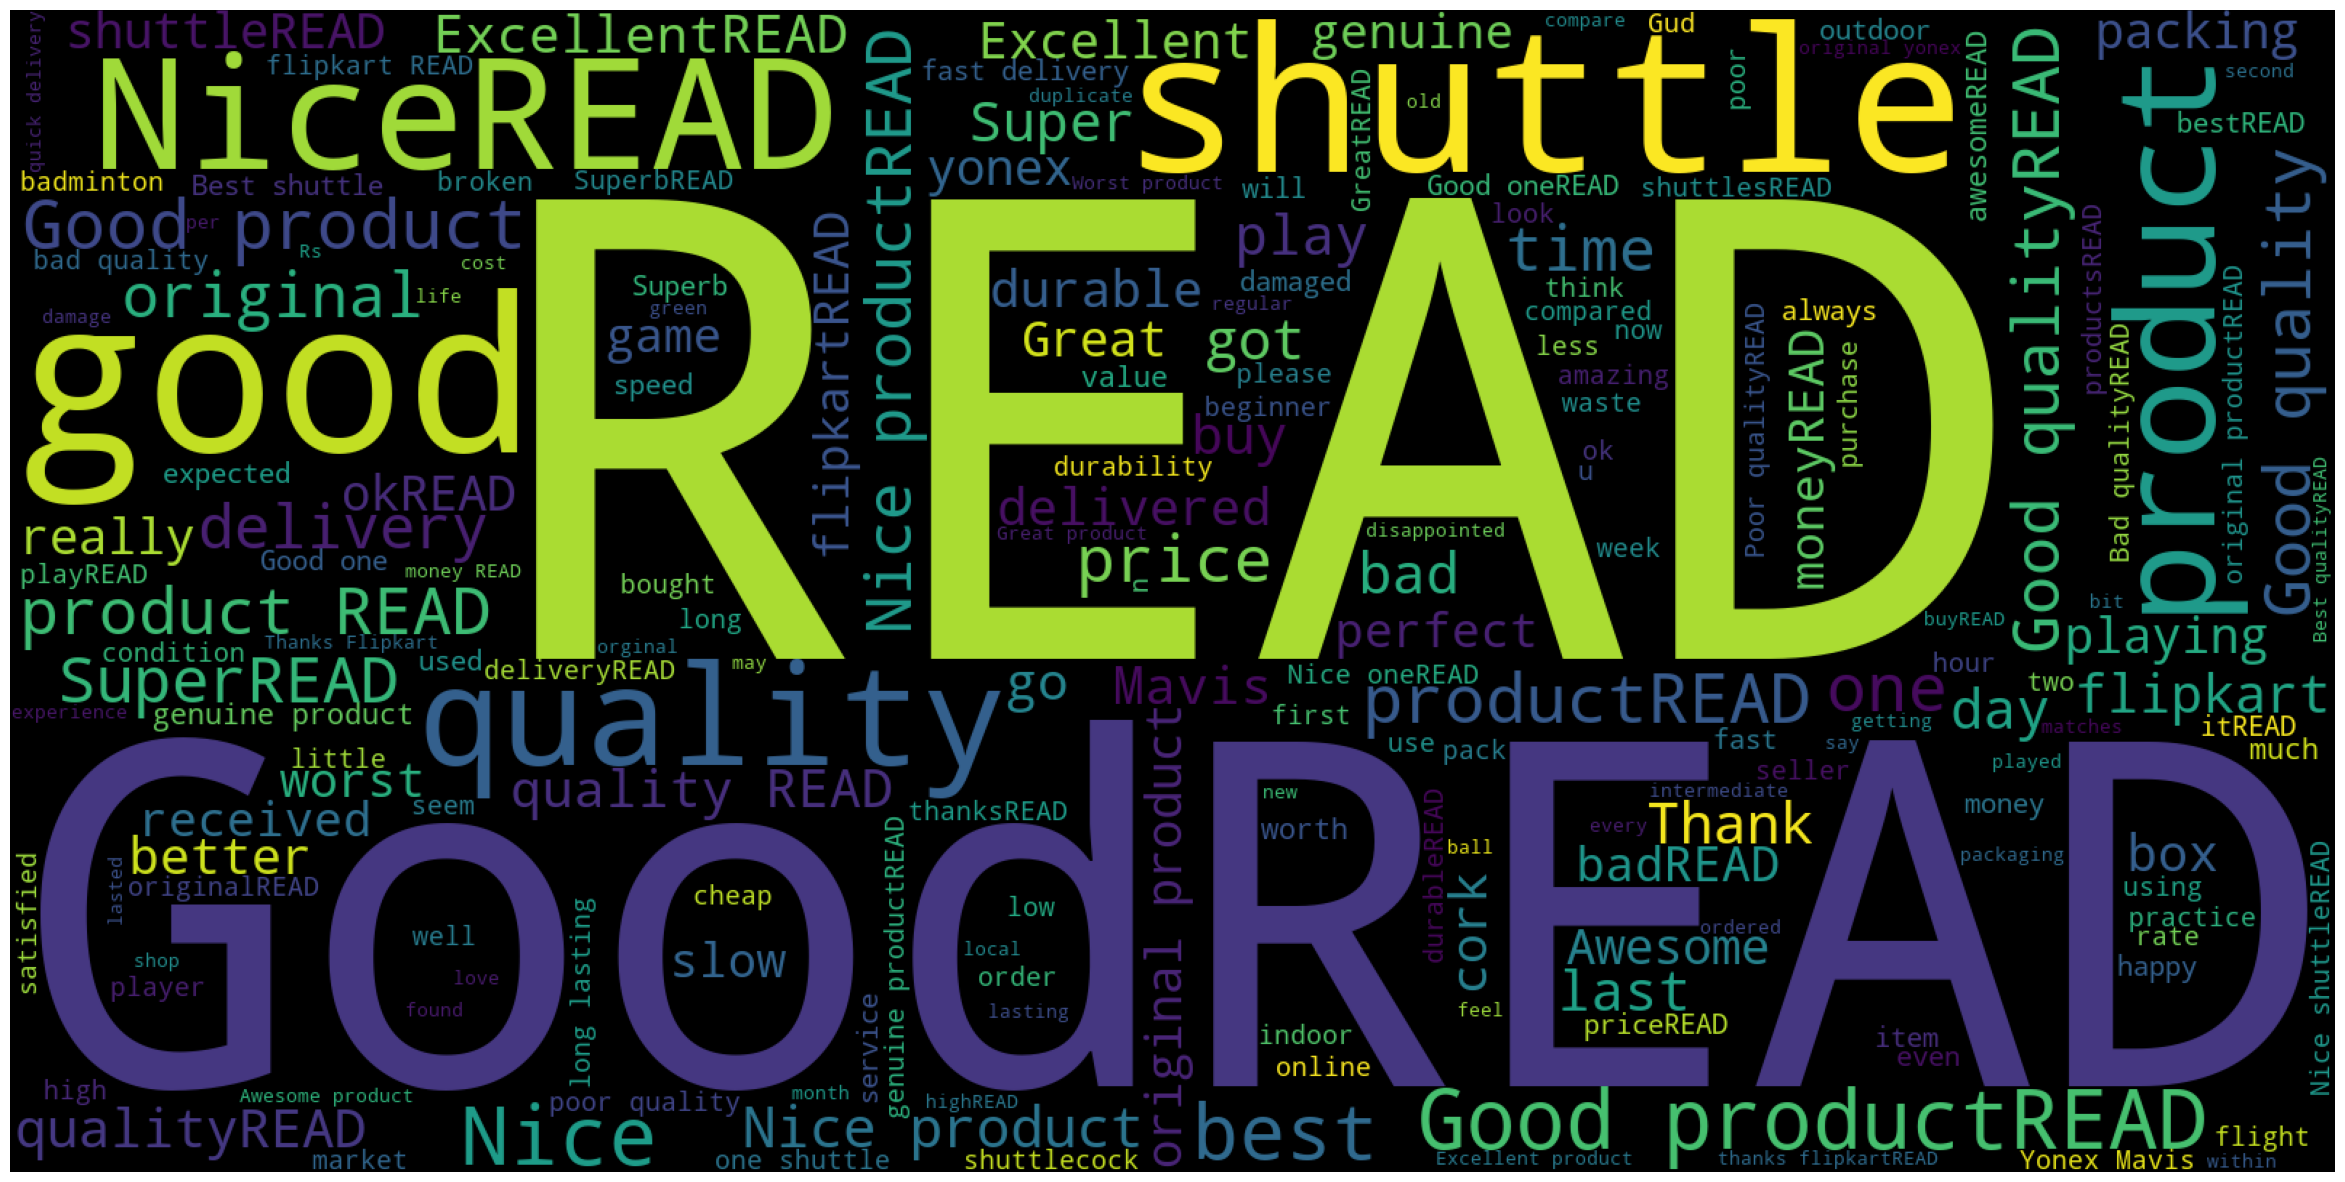

In [11]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6410, 1) (6410,)
(1603, 1) (1603,)


In [31]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [32]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", str(raw_text))
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [33]:
from tqdm import tqdm, tqdm_notebook

In [34]:
tqdm.pandas()

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Abinay
[nltk_data]     Rachakonda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
temp_df = X_train['Review text'].progress_apply(lambda text: preprocess(text,flag = 'lemma'))

temp_df.shape

100%|█████████████████████████████████████████████████████████████████████████████| 6410/6410 [00:14<00:00, 431.23it/s]


(6410, 2)

In [38]:
temp_df.columns=['Review_text_clean','Review_text_len']

In [42]:
temp_df.head()

,Review_text_clean,Review_text_len
250,product good like bought open market price als...,17
7735,love read,2
2805,goodread,1
4914,superread,1
1539,excellentread,1


In [37]:
temp_df_test = X_test['Review text'].progress_apply(lambda text: preprocess(text,flag = 'lemma'))

temp_df_test.shape

100%|█████████████████████████████████████████████████████████████████████████████| 1603/1603 [00:03<00:00, 484.90it/s]


(1603, 2)

In [40]:
temp_df_test.columns=['Review_text_clean','Review_text_len']

In [41]:
temp_df_test.head()

,Review_text_clean,Review_text_len
1880,nice product delivered ontime read,5
2188,good one problem day read,5
7075,superread,1
4967,genuine product go itread,4
3822,niceread,1


In [44]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

X_train_dtm = vect.fit_transform(temp_df['Review_text_clean'])

print(X_train_dtm.shape)

(6410, 2523)


In [45]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm = vect.transform(temp_df_test['Review_text_clean'])

print(X_test_dtm.shape)

(1603, 2523)


In [46]:
# Step 5: Building a Model (i.e. Train the classifier)

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 19.8 ms


MultinomialNB()

In [47]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9358814352574103

In [48]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 462,  316],
       [  95, 5537]], dtype=int64)

In [27]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9131736526946108

Text(0.5, 23.52222222222222, 'Predicted')

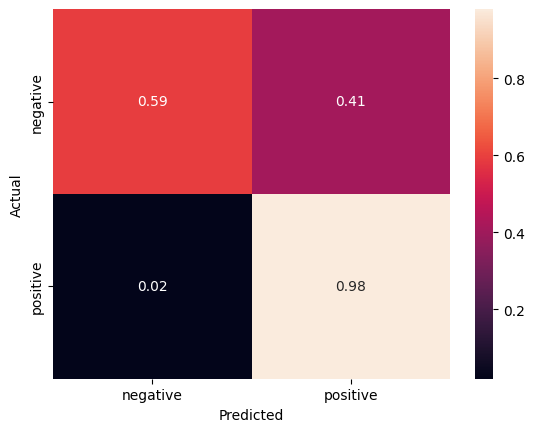

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [50]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9220212102308172

Text(0.5, 23.52222222222222, 'Predicted')

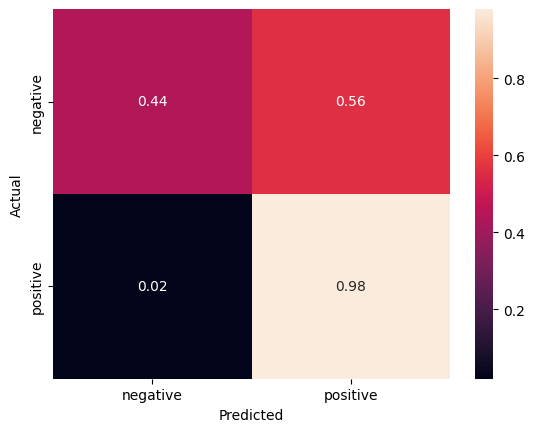

In [30]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [51]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.accuracy_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.accuracy_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9358814352574103
Test Score (F1 Score): 0.9220212102308172


In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_dtm, y_train)
y_test_pred = classifier.predict(X_test_dtm)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.924516531503431
              precision    recall  f1-score   support

    negative       0.81      0.51      0.63       198
    positive       0.93      0.98      0.96      1405

    accuracy                           0.92      1603
   macro avg       0.87      0.75      0.79      1603
weighted avg       0.92      0.92      0.92      1603



In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,weights='uniform',p=2,
                                metric='minkowski')
classifier.fit(X_train_dtm,y_train)
y_pred = classifier.predict(X_test_dtm)
y_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [58]:
from sklearn.metrics import classification_report,accuracy_score
a = classification_report(y_test,y_pred)

In [60]:
print(a)

              precision    recall  f1-score   support

    negative       0.74      0.38      0.50       198
    positive       0.92      0.98      0.95      1405

    accuracy                           0.91      1603
   macro avg       0.83      0.68      0.73      1603
weighted avg       0.90      0.91      0.89      1603



In [61]:
accuracy_score(y_test,y_pred)

0.9070492825951342

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_dtm, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_dtm)

# Assuming 'negative' is the positive class label
f1_svm = f1_score(y_test, y_pred_svm, pos_label='positive')
print("SVM F1-score:", f1_svm)
print(classification_report(y_test, y_test_pred))

SVM F1-score: 0.959190791768399
              precision    recall  f1-score   support

    negative       0.81      0.51      0.63       198
    positive       0.93      0.98      0.96      1405

    accuracy                           0.92      1603
   macro avg       0.87      0.75      0.79      1603
weighted avg       0.92      0.92      0.92      1603



In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 2min 49s
Wall time: 6min 13s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1500,
                                 preprocessor=<function clean at 0x000002BA8AF0C0D0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9111776447105788


In [71]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [72]:
import joblib
from joblib import Memory

import os

In [84]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define pipelines for each algorithm
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(temp_df['Review_text_clean'], y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(temp_df_test['Review_text_clean'], y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 15.2 s
Wall time: 26.5 s
Score on Test Data:  0.9220212102308172
********** decision_tree **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 17.1 s
Wall time: 31.5 s
Score on Test Data:  0.9201497192763568
********** logistic_regression **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: total: 7min 27s
Wall time: 11min 55s
Score on Test Data:  0.9070492825951342


In [85]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [92]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, r"C:\Users\Abinay Rachakonda\Desktop\Sentiment_Analysis_Ml\best_models/{name}.pkl")
    model = joblib.load(r"C:\Users\Abinay Rachakonda\Desktop\Sentiment_Analysis_Ml\best_models/{name}.pkl")

    %time y_test_pred = model.predict(temp_df_test['Review_text_clean'])
    print("Test Score (accuracy))", metrics.accuracy_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize( Deserialization

model = joblib.load('best_models/decision_tree.pkl')

# The following article was fetched from:
# https://www.cnbc.com/2024/03/01/euro-zone-inflation-q1-2024.html
# https://www.nbcnews.com/news/aliens-miami-mall-police-response-viral-speculation-rcna132524
new_data = [
    "The Product quality was somewhat ok"
]

new_data_clean = [preprocess_text(doc) for doc in new_data]

prediction = model.predict(new_data_clean)

print("Prediction:", prediction) Deserialization

model = joblib.load('best_models/decision_tree.pkl')

# The following article was fetched from:
# https://www.cnbc.com/2024/03/01/euro-zone-inflation-q1-2024.html
# https://www.nbcnews.com/news/aliens-miami-mall-police-response-viral-speculation-rcna132524
new_data = [
    "The Product quality was somewhat ok"
]

new_data_clean = [preprocess_text(doc) for doc in new_data]

prediction = model.predict(new_data_clean)

print("Prediction:", prediction){name}.pkl"), "Bytes")

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 31.4 ms
Test Score (accuracy)) 0.9220212102308172
Model Size: 146321 Bytes
********** decision_tree **********
CPU times: total: 31.2 ms
Wall time: 31.4 ms
Test Score (accuracy)) 0.9201497192763568
Model Size: 75084 Bytes
********** logistic_regression **********
CPU times: total: 31.2 ms
Wall time: 15.4 ms
Test Score (accuracy)) 0.9070492825951342
Model Size: 86020 Bytes
